<img src="images/picture1.png" alt="Drawing" style="width: 1000px;"/>

<a id='toc'></a>

### Table of Contents
* [0. Identify Business needs](#business)<br>
* [1. Import Data](#import) <br>
    * [1.1. Import the needed libraries](#lib)<br>
    * [1.2. Import and integrate data](#integrate)<br>
    * [1.3. Set index](#index)<br>
    * [1.4. Check for duplicates](#duplicates)<br>
* [2. Explore Data](#explore) <br>
    * [2.1. Basic Exploration](#basic)<br>
    * [2.2. Statistical Exploration](#stats)<br>
    * [2.3. Visual Exploration](#visual)<br>
    * [2.4. In-depth Exploration](#depth)<br>
* [3. Preprocess Data](#preprocess) <br>
    * [3.1. Data Cleaning](#clean)<br>
        * [3.1.1. Outliers](#outliers)<br>
        * [3.1.2. Missing Values](#missing)<br>
    * [3.2. Data Transformation](#transform)<br>
        * [3.2.1. Create new variables](#new)<br>
        * [3.2.2. Misclassifications](#misc)<br>
        * [3.2.3. Incoherencies](#inco)<br>
        * [3.2.4. Binning](#bin)<br>
        * [3.2.5. Reclassify](#rec)<br>
        * [3.2.6. Power Transform](#power)<br>
        * [3.2.7. Creating Dummy variables](#dummy)<br>
        * [3.2.8. Scaling](#scale)<br>
    * [3.3. Data Reduction](#reduce)<br>
        * [3.3.1. Multicollinearity - Check correlation](#corr)<br>
        * [3.3.2. Unary Variables](#unary)<br>
        * [3.3.3. Variables with a high percentage of missing values](#na)<br>
        * [3.3.4. PCA](#pca)

<img src="images/process_ML.png" alt="Drawing" style="width: 1000px;"/>

<a id='business'></a>

# <font color = '#cc9900'> 0. Identify Business needs </font>

First of all, we need to identify well the business needs.

<img src="images/phase01.png" alt="Drawing" style="width: 500px;"/>

• TugasRWe is a Portuguese retailer offering an assortment of goods within 5 major categories: Clothes, Housekeeping,
kitchen, small appliances and toys. <br><br>
• Tugas started a loyalty program 2 years ago. Among other objectives, the program’s aim is to gather Customer information
to better drive the marketing efforts. <br><br>
• There is enough historical information to start producing sound knowledge about their Customer database.IT extracted two files (at Customer Level) to be used by the analytical team. <br>

__Demographic.xlsx__

| Attribute | Description | 
| --- | --- |
| Custid | Unique identification of the customer |
| Year_Birth | Customer Year of Birth |
| Gender | Costumer Gender |
| Education | Costumer Education |
| Marital_Status | Costumer Marital Status |
| Dependents | Dependents (Yes = 1) |
| Income | Costumer Household Income |


__Firmographic.csv__

| Attribute | Description | 
| --- | --- |
| Custid | Unique identification of the customer |
| Rcn | Recency in days |
| Frq | Total Number of Purchases |
| Mnt | Total Amount spent on Purchases |
| Clothes | % Amount spent on clothes |
| Kitchen | % Amount spent on kitchen products |
| SmallAppliances | % Amount spent on small appliances |
| HouseKeeping | % Amount spent on housekeeping products |
| Toys | % Amount spent on toys |
| NetPurchase | % Purchases through the net channel |
| StorePurchase | % Purchases through the store |
| Recomendation | Recomendation [1-5] |
| Credit_Card | Information about Costumer Credit Card - Flag variable|

[BACK TO TOC](#toc)

<a id='import'></a>

# <font color = '#cc9900'> 1. Import Data </font>
<img src="images/phase02.png" alt="Drawing" style="width: 500px;"/>

<a id='lib'></a>

### 1.1. Import the needed libraries

__`Step 1`__ Import the following libraries/functions: 
    - pandas as pd 
    - pyplot from matplotlib as plt 
    - seaborn as sns
    - MinMaxScaler from sklearn.preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

<a id='integrate'></a>

### 1.2. Import and integrate data

__`Step 2`__ Import the excel file `demographic.xlsx` and store it in the object `demo`

In [2]:
demo = pd.read_excel('demographic.xlsx')
demo

,Custid,Year_Birth,Gender,Education,Marital_Status,Dependents,Income,Country
0,1003,1996,M,Graduation,NaN,1,29761.20,Portugal
1,1004,1961,M,Master,Married,1,98249.55,Portugal
2,1006,1988,F,PhD,Together,1,23505.30,Portugal
3,1007,1975,F,Graduation,Single,1,72959.25,Portugal
4,1009,1946,F,Graduation,Married,0,114973.95,Portugal
...,...,...,...,...,...,...,...,...
2496,10991,1945,F,Graduation,Married,0,132566.70,Portugal
2497,10993,1960,F,Graduation,Together,0,91768.95,Portugal
2498,10994,1966,F,Basic,Married,1,99085.35,Portugal
2499,10997,1944,F,2n Cycle,Together,1,132260.10,Portugal


__`Step 3`__ Import the csv file `firmographic.csv` and store it in the object `firmo`

In [3]:
firmo = pd.read_csv('firmographic.csv')
firmo

,Custid,Rcn,Frq,Mnt,Clothes,Kitchen,SmallAppliances,HouseKeeping,Toys,NetPurchase,StorePurchase,Recomendation,Credit_Card
0,1003,69,11,45.76,32,19,24,1,24,59,41,3,NaN
1,1004,10,26,923.52,60,10,19,6,5,35,65,5,NaN
2,1006,65,14,58.24,47,2,48,2,1,67,33,4,NaN
3,1007,73,18,358.80,71,7,13,1,8,46,54,4,NaN
4,1009,75,30,1457.04,38,9,35,9,9,17,83,5,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,10989,41,10,47.84,11,40,24,22,2,59,41,3,NaN
2496,10991,36,46,2320.24,32,4,47,9,8,22,78,6,NaN
2497,10993,1,25,870.48,56,8,27,8,1,47,53,4,NaN
2498,10994,1,28,931.84,68,5,21,3,4,55,45,5,NaN


__`Step 4`__ Merge the data from the two previous files and store it in the object `df`

In [4]:
df = demo.merge(firmo, on = 'Custid' )

<a id='index'></a>

### 1.3. Set Index 

__`Step 5`__ Define the variable "Custid" as the index of the dataframe using the method `set_index()`.

In [5]:
df.set_index('Custid', inplace = True)
df

,Year_Birth,Gender,Education,Marital_Status,Dependents,Income,Country,Rcn,Frq,Mnt,Clothes,Kitchen,SmallAppliances,HouseKeeping,Toys,NetPurchase,StorePurchase,Recomendation,Credit_Card
Custid,,,,,,,,,,,,,,,,,,,
1003,1996,M,Graduation,NaN,1,29761.20,Portugal,69,11,45.76,32,19,24,1,24,59,41,3,NaN
1004,1961,M,Master,Married,1,98249.55,Portugal,10,26,923.52,60,10,19,6,5,35,65,5,NaN
1006,1988,F,PhD,Together,1,23505.30,Portugal,65,14,58.24,47,2,48,2,1,67,33,4,NaN
1007,1975,F,Graduation,Single,1,72959.25,Portugal,73,18,358.80,71,7,13,1,8,46,54,4,NaN
1009,1946,F,Graduation,Married,0,114973.95,Portugal,75,30,1457.04,38,9,35,9,9,17,83,5,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10989,2001,F,Basic,Single,1,29551.20,Portugal,41,10,47.84,11,40,24,22,2,59,41,3,NaN
10991,1945,F,Graduation,Married,0,132566.70,Portugal,36,46,2320.24,32,4,47,9,8,22,78,6,NaN
10993,1960,F,Graduation,Together,0,91768.95,Portugal,1,25,870.48,56,8,27,8,1,47,53,4,NaN


<a id='duplicates'></a>

### 1.4. Check for duplicates

__`Step 6`__ Drop any duplicate rows present in the dataframe with the method `drop_duplicates()`

In [6]:
df.drop_duplicates(inplace = True)
df

,Year_Birth,Gender,Education,Marital_Status,Dependents,Income,Country,Rcn,Frq,Mnt,Clothes,Kitchen,SmallAppliances,HouseKeeping,Toys,NetPurchase,StorePurchase,Recomendation,Credit_Card
Custid,,,,,,,,,,,,,,,,,,,
1003,1996,M,Graduation,NaN,1,29761.20,Portugal,69,11,45.76,32,19,24,1,24,59,41,3,NaN
1004,1961,M,Master,Married,1,98249.55,Portugal,10,26,923.52,60,10,19,6,5,35,65,5,NaN
1006,1988,F,PhD,Together,1,23505.30,Portugal,65,14,58.24,47,2,48,2,1,67,33,4,NaN
1007,1975,F,Graduation,Single,1,72959.25,Portugal,73,18,358.80,71,7,13,1,8,46,54,4,NaN
1009,1946,F,Graduation,Married,0,114973.95,Portugal,75,30,1457.04,38,9,35,9,9,17,83,5,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10989,2001,F,Basic,Single,1,29551.20,Portugal,41,10,47.84,11,40,24,22,2,59,41,3,NaN
10991,1945,F,Graduation,Married,0,132566.70,Portugal,36,46,2320.24,32,4,47,9,8,22,78,6,NaN
10993,1960,F,Graduation,Together,0,91768.95,Portugal,1,25,870.48,56,8,27,8,1,47,53,4,NaN


[BACK TO TOC](#toc)

<a id='explore'></a>

# <font color = '#cc9900'> 2. Explore Data </font>

<img src="images/phase03.png" alt="Drawing" style="width: 500px;"/>

<a id='basic'></a>

### 2.1. Basic Exploration

__`Step 7`__ Check the number of rows and columns in the dataset using the attribute `shape`

In [7]:
df.shape

(2500, 19)

Our dataset contains 2500 rows and 20 columns.

__`Step 8`__ Check the name of the columns of our dataset using the attribute `columns`

In [8]:
df.columns

Index(['Year_Birth', 'Gender', 'Education', 'Marital_Status', 'Dependents',
       'Income', 'Country', 'Rcn', 'Frq', 'Mnt', 'Clothes', 'Kitchen',
       'SmallAppliances', 'HouseKeeping', 'Toys', 'NetPurchase',
       'StorePurchase', 'Recomendation', 'Credit_Card'],
      dtype='object')

__`Step 9`__ Check the first three rows of the dataset using the method `head()`

In [9]:
df.head(3)

,Year_Birth,Gender,Education,Marital_Status,Dependents,Income,Country,Rcn,Frq,Mnt,Clothes,Kitchen,SmallAppliances,HouseKeeping,Toys,NetPurchase,StorePurchase,Recomendation,Credit_Card
Custid,,,,,,,,,,,,,,,,,,,
1003,1996,M,Graduation,NaN,1,29761.20,Portugal,69,11,45.76,32,19,24,1,24,59,41,3,NaN
1004,1961,M,Master,Married,1,98249.55,Portugal,10,26,923.52,60,10,19,6,5,35,65,5,NaN
1006,1988,F,PhD,Together,1,23505.30,Portugal,65,14,58.24,47,2,48,2,1,67,33,4,NaN


In the same way, you have the method `tail()` that return the last rows of the dataset.

__`Step 10`__ Get more information of the dataset by calling the method `info()`

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 1003 to 10997
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year_Birth       2500 non-null   int64  
 1   Gender           2500 non-null   object 
 2   Education        2493 non-null   object 
 3   Marital_Status   2483 non-null   object 
 4   Dependents       2500 non-null   int64  
 5   Income           2431 non-null   float64
 6   Country          2500 non-null   object 
 7   Rcn              2500 non-null   int64  
 8   Frq              2500 non-null   int64  
 9   Mnt              2500 non-null   float64
 10  Clothes          2500 non-null   int64  
 11  Kitchen          2500 non-null   int64  
 12  SmallAppliances  2500 non-null   int64  
 13  HouseKeeping     2500 non-null   int64  
 14  Toys             2500 non-null   int64  
 15  NetPurchase      2500 non-null   int64  
 16  StorePurchase    2500 non-null   int64  
 17  Recomendat

We can verify that we are working with:
- 2 float variables
- 12 integer variables
- 6 object variables

We can also check that some of the variables have missing values. We are going to deal with this in a further step.

<a id='stats'></a>

### 2.2. Statistical Exploration

#### 2.3.1.) Numerical Variables

__`Step 11`__ Get the main descriptive statistics for all the numeric variables in using the method `.describe()`

In [11]:
df.describe()
# df.describe().T

,Year_Birth,Dependents,Income,Rcn,Frq,Mnt,Clothes,Kitchen,SmallAppliances,HouseKeeping,Toys,NetPurchase,StorePurchase,Recomendation
count,2500.000000,2500.000000,2431.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.00000,2500.000000,2500.000000,2500.000000
mean,1971.737200,0.701200,74062.838873,62.938400,19.989200,654.829760,50.982000,6.958800,28.233200,6.88080,6.92920,42.077600,57.922400,3.952800
std,17.046019,0.457824,28807.225833,69.643494,10.951249,676.453079,23.390283,7.836738,12.617674,7.63363,7.92094,18.274582,18.274582,1.141531
min,1942.000000,0.000000,10500.000000,0.000000,3.000000,8.320000,2.000000,0.000000,2.000000,0.00000,0.00000,5.000000,12.000000,1.000000
25%,1957.000000,0.000000,51013.725000,27.000000,11.000000,66.560000,33.000000,2.000000,19.000000,2.00000,1.00000,27.000000,43.000000,3.000000
50%,1971.000000,1.000000,74525.850000,53.000000,18.000000,401.960000,51.000000,4.000000,27.000000,4.00000,4.00000,45.000000,55.000000,4.000000
75%,1986.000000,1.000000,97300.875000,78.000000,28.000000,1069.120000,70.000000,9.000000,37.000000,9.00000,10.00000,57.000000,73.000000,5.000000
max,2002.000000,1.000000,144204.900000,549.000000,58.000000,3055.520000,98.000000,68.000000,69.000000,54.00000,77.00000,88.000000,95.000000,6.000000


From the above table, we can get some conclusions. Some examples are:
- `count`- The income variable has 2431 valid values. We have a problem of missing values in here.
- `mean`- In average, my customers spent on my store 654 monetary units;
- `std`- The standard deviation of Income is quite high. This indicates that the values are spread out over a wider range.
- `min`- All the customers have bought in my store at least 3 times.
- `50%`- Half of my customers spend till 402 monetary units on my store.
- `max`- The maximum value for recommendation is 6. This is an incoherence - according to the business needs, the range is between 1 and 5.

The `describe()` method provides the main descriptive statistics: count, mean, standard deviation, minimum value, 25 percentile, 50 percentile or median, 75 percentile and maximum value. 
<br>
However, you can call directly other measures, such as the skewness or the kurtosis.

__`Step 12`__ Get the skewness associated with each variable in the dataset using the method `skew()`

In [12]:
df.skew()

Year_Birth         0.066038
Dependents        -0.879645
Income            -0.008810
Rcn                4.078153
Frq                0.703346
Mnt                0.991759
Clothes           -0.076380
Kitchen            2.192946
SmallAppliances    0.319840
HouseKeeping       2.013936
Toys               2.408100
NetPurchase       -0.241966
StorePurchase      0.241966
Recomendation     -0.112705
dtype: float64

Concerning the variables skewness, we can conclude the following:
- `Moderate skewness (between |0.5| and |1.0|)`: Dependents, Frq, Mnt, 
- `High skewness (higher than |1.0|)`: Rcn, Kitchen, HouseKeeping, Toys

__`Step 13`__ Get the kurtosis associated with the variable `Rcn` using the method `kurt()`

In [13]:
df[['Rcn','Kitchen']].kurt()

Rcn        20.083685
Kitchen     6.858773
dtype: float64

High kurtosis in a data set is an indicator that data has heavy tails or outliers. A standard normal distribution has a kurtosis of 3, so values higher than that could indicate presence of outliers.
We need to check further this variable about the presence of possible outliers.

#### 2.3.2.) Categorical Variables

__`Step 14`__ Get the main descriptive statistics for all the categorical variables in using the method `.describe(include = ['O'])`

In [14]:
df.describe(include = ['O'])

,Gender,Education,Marital_Status,Country,Credit_Card
count,2500,2493,2483,2500,67
unique,3,6,9,1,2
top,F,Graduation,Married,Portugal,No
freq,1910,1224,915,2500,35


We can verify some problems or issues that we need to address before applying a model:
- We have 3 possible values for Gender, 6 for Education and 9 for Marital Status: we need to check further if all those values are acceptable;
- The variable country is unary - we only have one possible value;
- The credit card has only 67 values in 2500 filled. Maybe we should drop this variable.

__`Step 15`__ Check the levels/possible values in the variables "Gender", "Education" and "Marital_Status" using the method `value_counts()`

In [15]:
df['Gender'].value_counts()

F    1910
M     585
?       5
Name: Gender, dtype: int64

We have 5 observations with a value of "?". We need to change this value, since it is not a valid value.

In [16]:
df['Education'].value_counts()

Graduation    1224
2n Cycle       425
Master         372
Basic          299
PhD            167
OldSchool        6
Name: Education, dtype: int64

We have some problems in this variable:
    - OldSchool is not a valid value;
    - Not clear what is 2n Cycle and Basic Education. 
      Should we have values like this when nowadays high school is obligatory?
      
We need to make some transformations in this variable also.

In [17]:
df['Marital_Status'].value_counts()

Married         915
Together        604
Single          596
Divorced        230
Widow           115
BigConfusion     19
TOGETHER          2
MARRIED           1
DIVORCED          1
Name: Marital_Status, dtype: int64

It seems that this variable needs also some transformations:
    - Together, Married and Divorced are written sometimes using capital letters;
    - BigConfusion is not a valid value;
    - Does it make sense to have Together and Married into two different levels?

<a id='visual'></a>

### 2.3. Visual Exploration

#### 2.3.1.) Numerical Variables
__`Step 16`__ Check the distribution of the variable 'Mnt' using a `histplot()`. Define the color as green and the number of bins equal to 10.

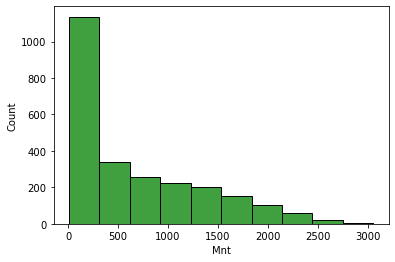

In [18]:
sns.histplot(df['Mnt'], color="g", bins = 10)

__`Step 17`__ Create a `scatterplot` where the x axis represent the Income and the y axis define the Mnt spent for each customer using seaborn.

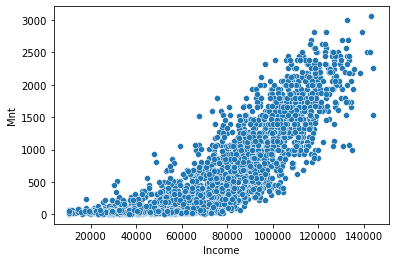

In [19]:
sns.scatterplot(x = 'Income', y= 'Mnt', data = df)

We can clearly see that the higher the Income, the higher the monetary spent on our store.

__`Step 17.B`__ This time, create a scatterplot similar to the previous one, but with the following changes:
- Define the size of the figure as (12,8)
- Create a scatterplot where the x axis will define the Income and the y axis will represent the Mnt. Use the parameter hue to represent a third variable, the recomendation.
- Define the lower limit of y as -200
- Define the lower limit of x as 0
- Define the ticks of the x axis between 0 and 160000, in steps of 30000
- Define the title of the plot as "Income vs Monetary vs Recomendation", with a fontsize of 16 and a blue color
- The legend of the plot should be on the upper left area and the title of the legend should be "Recomendation"
- Define the label of the x axis as "Customer's Income"
- Remove the top and right axis of the plot
- Save the figure as "my_plot.png", with a resolution of 300 dots per inch and with no background.

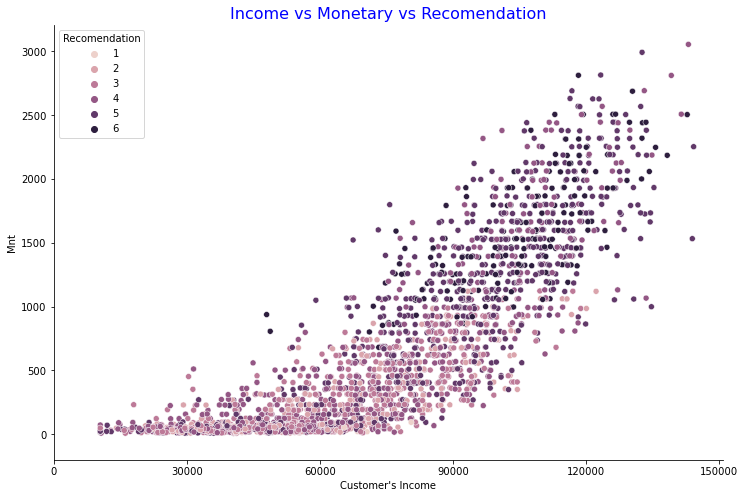

In [20]:
figure = plt.figure(figsize=(12,8))
ax = plt.subplot(111) #  "111" means "1x1 grid, first subplot" and "234" means "2x3 grid, 4th subplot".
sns.scatterplot(x = 'Income', y = 'Mnt', data = df, hue = 'Recomendation')


# define the limits of y axis using matplotlib.pyplot.ylim
plt.ylim(-200,None)
# define the limits of x axis using matplotlib.pyplot.xlim
plt.xlim(0,None)
# define the ticks in x axis using matplotlib.pyplot.xticks(start, stop, step)
# np.arange - Return evenly spaced values within a given interval.
plt.xticks(np.arange(0,160000,30000))
# define the title using matplotlib.pyplot.title
plt.title('Income vs Monetary vs Recomendation', fontsize= 16, color = 'blue')
# define the legend using matplotlib.pyplot.legend
plt.legend(loc = 'upper left', title = 'Recomendation')
# define the label for x axis using matplotlib.pyplot.xlabel
plt.xlabel("Customer's Income")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('my_plot.png', dpi = 300, transparent = True)

__`Step 18`__ Plot the pairwise relationships of the variables "Clothes", "Toys" and "HouseKeeping" using a `pairplot`

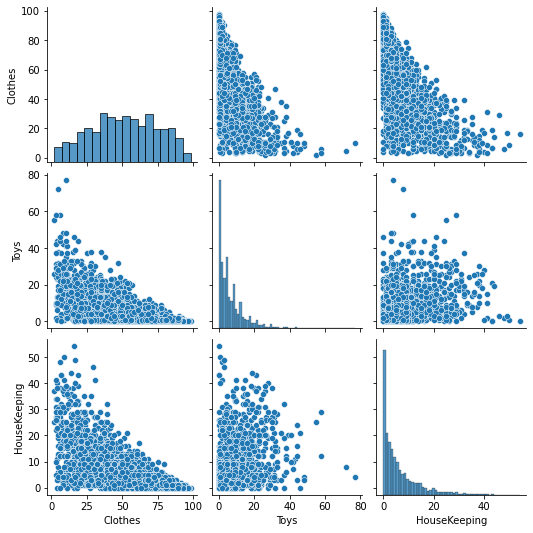

In [21]:
df_subset = df[['Clothes', 'Toys', 'HouseKeeping']].copy()
sns.pairplot(df_subset)

__`Step 19`__ Check the spearman correlation between numerical variables using the method `corr(method = 'spearman')`.

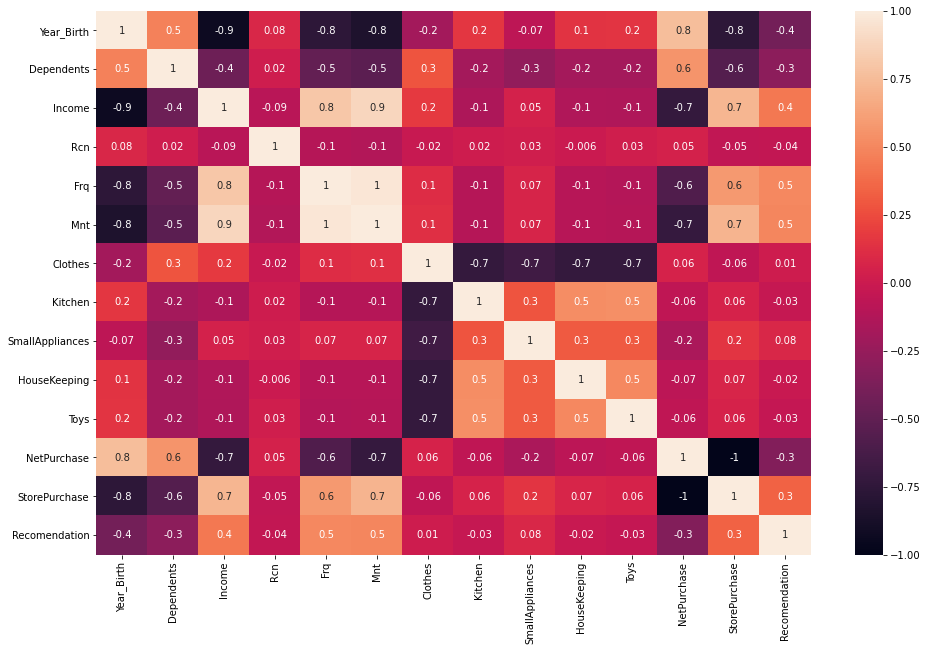

In [22]:
df_corr = df.corr(method = 'spearman')
figure = plt.figure(figsize=(16,10))
sns.heatmap(df_corr, annot=True, fmt = '.1g')

We can verify that NetPurchase and StorePurchase have a perfect negative correlation. We don't need both variables. We are going to remove one of them in __`Step `__ 

#### 2.3.2.) Categorical Variables

__`Step 20`__ Show the counts of observations in each categorical bin using bars for the variable "Marital_Status" using a `countplot()`.
Define the hue as "Gender". Show only the counting for Single, Divorced, Widow, Married and Together in this order.

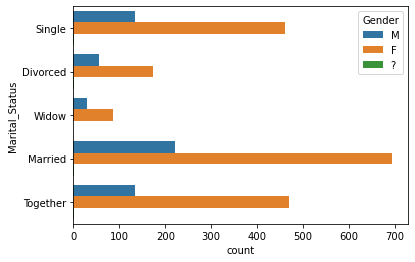

In [23]:
sns.countplot(y = 'Marital_Status', hue = 'Gender', data = df,
             order = ['Single','Divorced','Widow','Married','Together'])

__`Step 21`__ Draw a scatterplot between Income (numerical variable) and Education (categorical variable) using the `stripplot()`

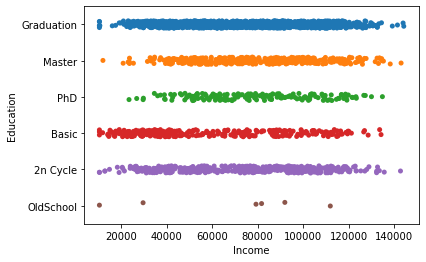

In [24]:
sns.stripplot(x = 'Income', y = 'Education', data = df)

We cannot see any big differences on the money earned depending on the Education level.

<a id='depth'></a>

### 2.4. In-depth Exploration

We can go further and try to understand better our population of study using the methods `groupby()` and `query()`

__`Step 22`__ What is the mean value of `Mnt` when `Dependents` is equal to 0? And when is equal to 1? Use `groupby()`.

In [25]:
df.groupby('Dependents')['Mnt'].mean()

Dependents
0    1276.316680
1     389.997627
Name: Mnt, dtype: float64

__`Step 23`__ What is the median value of `Mnt` spent by female customers when `Dependents` is equal to 0? And when is equal to 1? Use `groupby()` and `query()`

In [26]:
df.query('Gender == "F"').groupby('Dependents')['Mnt'].median()

Dependents
0    1333.28
1     195.52
Name: Mnt, dtype: float64

[BACK TO TOC](#toc)

<a id='preprocess'></a>

# <font color = '#cc9900'> 3. Preprocess Data </font>

<img src="images/phase04.png" alt="Drawing" style="width: 500px;"/>

<a id='clean'></a>

## 3.1. Data Cleaning

<a id='outliers'></a>

### 3.1.1. Outliers

In __Step 13__ we understood that the variables "Rcn" and "Kitchen", due to the high kurtosis, could have potential outliers. In the following steps we are going to investigate further this possible situation.

__`Step 24`__ Create a figure with two axes, where the boxplots of the variables "Rcn" and "Kitchen" are shown. Use the `boxplot()` from seaborn. 

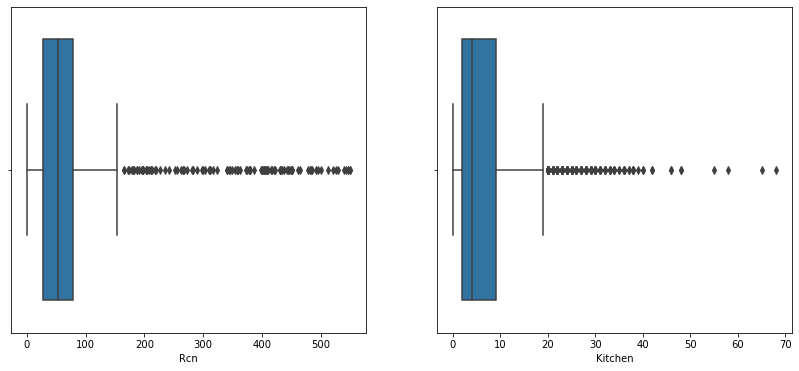

In [27]:
fig, axes = plt.subplots(1,2, figsize = (14,6))
sns.boxplot(ax = axes[0], data = df, x = 'Rcn')
sns.boxplot(ax = axes[1], data = df, x = 'Kitchen')

__`Step 25`__ Create a figure with two axes, where the histplots of the variables "Rcn" and "Kitchen" are shown. Use the `histplot()` from seaborn. 

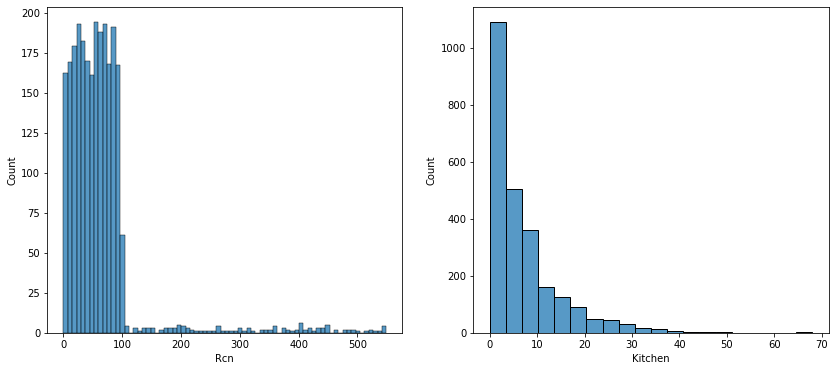

In [28]:
fig, axes = plt.subplots(1,2, figsize = (14,6))
sns.histplot(ax = axes[0], data = df, x = 'Rcn')
sns.histplot(ax = axes[1], data = df, x = 'Kitchen', bins = 20)

__`Step 26`__ Remove the observations where Kitchen is higher than 50 using the method `drop()`.

In [29]:
df_no_outliers = df.drop(df[df['Kitchen'] > 50].index)
df_no_outliers

,Year_Birth,Gender,Education,Marital_Status,Dependents,Income,Country,Rcn,Frq,Mnt,Clothes,Kitchen,SmallAppliances,HouseKeeping,Toys,NetPurchase,StorePurchase,Recomendation,Credit_Card
Custid,,,,,,,,,,,,,,,,,,,
1003,1996,M,Graduation,NaN,1,29761.20,Portugal,69,11,45.76,32,19,24,1,24,59,41,3,NaN
1004,1961,M,Master,Married,1,98249.55,Portugal,10,26,923.52,60,10,19,6,5,35,65,5,NaN
1006,1988,F,PhD,Together,1,23505.30,Portugal,65,14,58.24,47,2,48,2,1,67,33,4,NaN
1007,1975,F,Graduation,Single,1,72959.25,Portugal,73,18,358.80,71,7,13,1,8,46,54,4,NaN
1009,1946,F,Graduation,Married,0,114973.95,Portugal,75,30,1457.04,38,9,35,9,9,17,83,5,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10989,2001,F,Basic,Single,1,29551.20,Portugal,41,10,47.84,11,40,24,22,2,59,41,3,NaN
10991,1945,F,Graduation,Married,0,132566.70,Portugal,36,46,2320.24,32,4,47,9,8,22,78,6,NaN
10993,1960,F,Graduation,Together,0,91768.95,Portugal,1,25,870.48,56,8,27,8,1,47,53,4,NaN


<a id='missing'></a>

### 3.1.2. Missing Values

__`Step 27`__ Check how many missing values you have in the dataset using `isna().sum()`

In [30]:
df.isna().sum()

Year_Birth            0
Gender                0
Education             7
Marital_Status       17
Dependents            0
Income               69
Country               0
Rcn                   0
Frq                   0
Mnt                   0
Clothes               0
Kitchen               0
SmallAppliances       0
HouseKeeping          0
Toys                  0
NetPurchase           0
StorePurchase         0
Recomendation         0
Credit_Card        2433
dtype: int64

__`Step 28`__ Fill with the method `fillna()` those missing values. For the categorical variables, use the most frequent value and for the numerical ones use the median.

In [31]:
df.fillna({
    'Education': df['Education'].value_counts().idxmax(),
    'Marital_Status': df['Marital_Status'].value_counts().idxmax(),
    'Income':df['Income'].median()
    }, inplace = True)
df.isna().sum()/len(df)

Year_Birth         0.0000
Gender             0.0000
Education          0.0000
Marital_Status     0.0000
Dependents         0.0000
Income             0.0000
Country            0.0000
Rcn                0.0000
Frq                0.0000
Mnt                0.0000
Clothes            0.0000
Kitchen            0.0000
SmallAppliances    0.0000
HouseKeeping       0.0000
Toys               0.0000
NetPurchase        0.0000
StorePurchase      0.0000
Recomendation      0.0000
Credit_Card        0.9732
dtype: float64

We still have a variable ("Credit_Card") with 97% of values missing. We are going to remove this variable in a further step.

[BACK TO TOC](#toc)

<a id='transform'></a>

## 3.2. Data Transformation

<a id='new'></a>

### 3.2.1. Create new variables

__`Step 29`__ Create the variable "Age" from the "Year_Birth".

In [32]:
from datetime import date
df['Age'] = date.today().year - df['Year_Birth']
df

,Year_Birth,Gender,Education,Marital_Status,Dependents,Income,Country,Rcn,Frq,Mnt,Clothes,Kitchen,SmallAppliances,HouseKeeping,Toys,NetPurchase,StorePurchase,Recomendation,Credit_Card,Age
Custid,,,,,,,,,,,,,,,,,,,,
1003,1996,M,Graduation,Married,1,29761.20,Portugal,69,11,45.76,32,19,24,1,24,59,41,3,NaN,25
1004,1961,M,Master,Married,1,98249.55,Portugal,10,26,923.52,60,10,19,6,5,35,65,5,NaN,60
1006,1988,F,PhD,Together,1,23505.30,Portugal,65,14,58.24,47,2,48,2,1,67,33,4,NaN,33
1007,1975,F,Graduation,Single,1,72959.25,Portugal,73,18,358.80,71,7,13,1,8,46,54,4,NaN,46
1009,1946,F,Graduation,Married,0,114973.95,Portugal,75,30,1457.04,38,9,35,9,9,17,83,5,Yes,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10989,2001,F,Basic,Single,1,29551.20,Portugal,41,10,47.84,11,40,24,22,2,59,41,3,NaN,20
10991,1945,F,Graduation,Married,0,132566.70,Portugal,36,46,2320.24,32,4,47,9,8,22,78,6,NaN,76
10993,1960,F,Graduation,Together,0,91768.95,Portugal,1,25,870.48,56,8,27,8,1,47,53,4,NaN,61


__`Step 30`__ Create a new variable where the purpose is to understand how much money a customer spend on my store each time.

In [33]:
df['MntFrq'] = df['Mnt']/df['Frq']
df

,Year_Birth,Gender,Education,Marital_Status,Dependents,Income,Country,Rcn,Frq,Mnt,...,Kitchen,SmallAppliances,HouseKeeping,Toys,NetPurchase,StorePurchase,Recomendation,Credit_Card,Age,MntFrq
Custid,,,,,,,,,,,,,,,,,,,,,
1003,1996,M,Graduation,Married,1,29761.20,Portugal,69,11,45.76,...,19,24,1,24,59,41,3,NaN,25,4.160000
1004,1961,M,Master,Married,1,98249.55,Portugal,10,26,923.52,...,10,19,6,5,35,65,5,NaN,60,35.520000
1006,1988,F,PhD,Together,1,23505.30,Portugal,65,14,58.24,...,2,48,2,1,67,33,4,NaN,33,4.160000
1007,1975,F,Graduation,Single,1,72959.25,Portugal,73,18,358.80,...,7,13,1,8,46,54,4,NaN,46,19.933333
1009,1946,F,Graduation,Married,0,114973.95,Portugal,75,30,1457.04,...,9,35,9,9,17,83,5,Yes,75,48.568000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10989,2001,F,Basic,Single,1,29551.20,Portugal,41,10,47.84,...,40,24,22,2,59,41,3,NaN,20,4.784000
10991,1945,F,Graduation,Married,0,132566.70,Portugal,36,46,2320.24,...,4,47,9,8,22,78,6,NaN,76,50.440000
10993,1960,F,Graduation,Together,0,91768.95,Portugal,1,25,870.48,...,8,27,8,1,47,53,4,NaN,61,34.819200


<a id='misc'></a>

### 3.2.2. Misclassifications

__`Step 31`__ Review the counting for possible values in the Gender variable using `value_counts()`

In [34]:
df['Gender'].value_counts()

F    1910
M     585
?       5
Name: Gender, dtype: int64

__`Step 31.B`__ Replace the "?" with the most frequent value using `value_counts().idxmax()`, which is going to return the most frequent value.

In [35]:
df['Gender'] = df['Gender'].replace('?',df['Gender'].value_counts().idxmax())
df['Gender'].value_counts()

F    1915
M     585
Name: Gender, dtype: int64

__`Step 32`__ Review the counting for possible values in the Marital_Status variable with `value_counts()`

In [36]:
df['Marital_Status'].value_counts()

Married         932
Together        604
Single          596
Divorced        230
Widow           115
BigConfusion     19
TOGETHER          2
MARRIED           1
DIVORCED          1
Name: Marital_Status, dtype: int64

__`Step 32.B`__ Change "TOGETHER" to "Together" and do the same (Capitalize the words) for "DIVORCED" and "MARRIED" using `str.capitalize()`

In [37]:
df['Marital_Status'] = df['Marital_Status'].str.capitalize() 
df['Marital_Status'].value_counts()

Married         933
Together        606
Single          596
Divorced        231
Widow           115
Bigconfusion     19
Name: Marital_Status, dtype: int64

__`Step 32.C`__ Replace the "BigConfusion" with the most frequent value.

In [38]:
df['Marital_Status'] = df['Marital_Status'].replace('Bigconfusion',df['Marital_Status'].value_counts().idxmax())
df['Marital_Status'].value_counts()

Married     952
Together    606
Single      596
Divorced    231
Widow       115
Name: Marital_Status, dtype: int64

__`Step 33`__ Review the counting for possible values in the Education variable.

In [39]:
df['Education'].value_counts()

Graduation    1231
2n Cycle       425
Master         372
Basic          299
PhD            167
OldSchool        6
Name: Education, dtype: int64

__`Step 33.B`__ Replace the "OldSchool" with the most frequent value with `value_counts().idxmax()`.

In [40]:
df['Education'] = df['Education'].replace('OldSchool',df['Education'].value_counts().idxmax())
df['Education'].value_counts()

Graduation    1237
2n Cycle       425
Master         372
Basic          299
PhD            167
Name: Education, dtype: int64

<a id='inco'></a>

### 3.2.3. Incoherencies

__`Step 34`__ Check possible incoherencies in your data. One situation that is impossible to happen is to have values of frequency equal to 0 when there was some money spent by the customer. Change those values of Frequency to 1.

In [41]:
if((df['Mnt']>0).any() & (df['Frq']==0).any()):
    df.loc[data['Mnt']>0, 'Frq']=1

<a id='bin'></a>

### 3.2.4. Binning

__`Step 35`__ Create a new variable named as "Income_bins" where Income is going to be represented in thre possible values - "Low", "Medium" and "High". By using the method `cut()`, those are going to be equal-width bins.

In [42]:
df['Income_bins'] = pd.cut(df['Income'], 3, labels=["low", "medium", "high"])
df

,Year_Birth,Gender,Education,Marital_Status,Dependents,Income,Country,Rcn,Frq,Mnt,...,SmallAppliances,HouseKeeping,Toys,NetPurchase,StorePurchase,Recomendation,Credit_Card,Age,MntFrq,Income_bins
Custid,,,,,,,,,,,,,,,,,,,,,
1003,1996,M,Graduation,Married,1,29761.20,Portugal,69,11,45.76,...,24,1,24,59,41,3,NaN,25,4.160000,low
1004,1961,M,Master,Married,1,98249.55,Portugal,10,26,923.52,...,19,6,5,35,65,5,NaN,60,35.520000,medium
1006,1988,F,PhD,Together,1,23505.30,Portugal,65,14,58.24,...,48,2,1,67,33,4,NaN,33,4.160000,low
1007,1975,F,Graduation,Single,1,72959.25,Portugal,73,18,358.80,...,13,1,8,46,54,4,NaN,46,19.933333,medium
1009,1946,F,Graduation,Married,0,114973.95,Portugal,75,30,1457.04,...,35,9,9,17,83,5,Yes,75,48.568000,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10989,2001,F,Basic,Single,1,29551.20,Portugal,41,10,47.84,...,24,22,2,59,41,3,NaN,20,4.784000,low
10991,1945,F,Graduation,Married,0,132566.70,Portugal,36,46,2320.24,...,47,9,8,22,78,6,NaN,76,50.440000,high
10993,1960,F,Graduation,Together,0,91768.95,Portugal,1,25,870.48,...,27,8,1,47,53,4,NaN,61,34.819200,medium


<a id='rec'></a>

### 3.2.5. Reclassify

__`Step 36`__ Due to the similarity of the classification, change the value "Together" to "Married" in Marital_Status using the method `replace()`.

In [43]:
df['Marital_Status'] = df['Marital_Status'].replace('Together','Married')
df['Marital_Status'].value_counts()

Married     1558
Single       596
Divorced     231
Widow        115
Name: Marital_Status, dtype: int64

__`Step 37`__ Since we are not sure about what 2nd Cycle and Basic School means, we are going to create a new binary variable where if the customer has higher education we assign the value 1, and 0 otherwise.
Remove the variable "education".

In [44]:
df['Higher_Educ'] = np.where((df['Education']=='Graduation')|
                               (df['Education']=='Master')|
                               (df['Education']=='PhD'),1,0)
df.drop('Education', axis = 1, inplace = True)
df

,Year_Birth,Gender,Marital_Status,Dependents,Income,Country,Rcn,Frq,Mnt,Clothes,...,HouseKeeping,Toys,NetPurchase,StorePurchase,Recomendation,Credit_Card,Age,MntFrq,Income_bins,Higher_Educ
Custid,,,,,,,,,,,,,,,,,,,,,
1003,1996,M,Married,1,29761.20,Portugal,69,11,45.76,32,...,1,24,59,41,3,NaN,25,4.160000,low,1
1004,1961,M,Married,1,98249.55,Portugal,10,26,923.52,60,...,6,5,35,65,5,NaN,60,35.520000,medium,1
1006,1988,F,Married,1,23505.30,Portugal,65,14,58.24,47,...,2,1,67,33,4,NaN,33,4.160000,low,1
1007,1975,F,Single,1,72959.25,Portugal,73,18,358.80,71,...,1,8,46,54,4,NaN,46,19.933333,medium,1
1009,1946,F,Married,0,114973.95,Portugal,75,30,1457.04,38,...,9,9,17,83,5,Yes,75,48.568000,high,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10989,2001,F,Single,1,29551.20,Portugal,41,10,47.84,11,...,22,2,59,41,3,NaN,20,4.784000,low,0
10991,1945,F,Married,0,132566.70,Portugal,36,46,2320.24,32,...,9,8,22,78,6,NaN,76,50.440000,high,1
10993,1960,F,Married,0,91768.95,Portugal,1,25,870.48,56,...,8,1,47,53,4,NaN,61,34.819200,medium,1


<a id='power'></a>

### 3.2.6. Power Transform

__`Step 38`__ Create a new variable "sqrt_rcn" by applying a square root transformation to the variable "Rcn", in order to try to normalize the variable.

In [45]:
df['sqrt_rcn'] = np.sqrt(df['Rcn'])

__`Step 38.B`__ Compare the distribution of the variables 'Rcn' and 'sqrt_rcn' with a histplot.

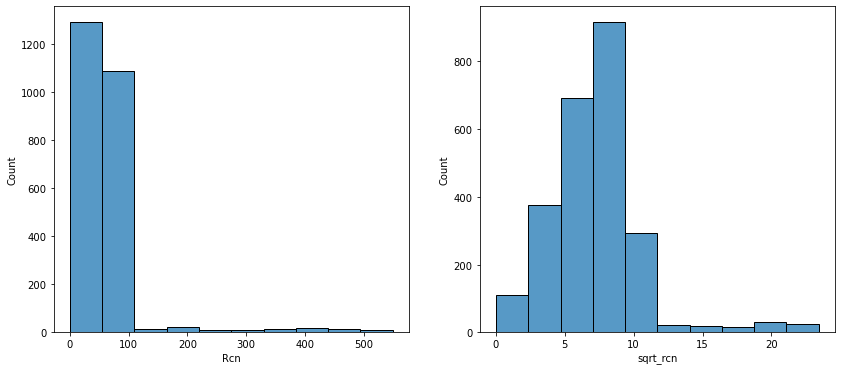

In [46]:
fig, axes = plt.subplots(1,2, figsize = (14,6))
sns.histplot(ax = axes[0], data = df, x = 'Rcn', bins = 10)
sns.histplot(ax = axes[1], data = df, x = 'sqrt_rcn', bins = 10)

Before applying scaling in our final dataset, we are going to remove some features that could lead to problems on modelling or even on the scaling.

[BACK TO TOC](#toc)

<a id='reduce'></a>

## 3.3. Data Reduction 

<a id='corr'></a>

### 3.3.1. Multicollinearity - Check correlation

We understood in __Step 19__, using the heatmap to check the spearman correlation between the variables, that NetPurchase had a perfect negative relationship with StorePurchase. We don't need both, so we are going to remove one of those.

__`Step 39`__ Drop the variable "NetPurchase", since it is highly correlated with "StorePurchase". Do the same with Date_Birth, since we used this variable to calculate "Age" and they are highly correlated using `drop()`

In [47]:
print("Initial number of variables:", df.shape)
df.drop('NetPurchase', axis = 1, inplace = True)
df.drop('Year_Birth', axis = 1, inplace = True)
df.shape

Initial number of variables: (2500, 23)


(2500, 21)

<a id='unary'></a>

### 3.3.2. Unary Variables

__`Step 40`__ Drop the variable "Country", since it is an unary variable with `drop()`

In [48]:
df.drop('Country', axis = 1, inplace = True)

<a id='na'></a>

### 3.3.3. Variables with a high percentage of missing values

__`Step 41`__ Drop the variable "Credit_Card", since it has 97% of the values missing using `dropna()`

In [49]:
#data.drop('Credit_Card', axis = 1, inplace = True)
df.dropna(axis = 1, thresh = len(df)/100*90)

,Gender,Marital_Status,Dependents,Income,Rcn,Frq,Mnt,Clothes,Kitchen,SmallAppliances,HouseKeeping,Toys,StorePurchase,Recomendation,Age,MntFrq,Income_bins,Higher_Educ,sqrt_rcn
Custid,,,,,,,,,,,,,,,,,,,
1003,M,Married,1,29761.20,69,11,45.76,32,19,24,1,24,41,3,25,4.160000,low,1,8.306624
1004,M,Married,1,98249.55,10,26,923.52,60,10,19,6,5,65,5,60,35.520000,medium,1,3.162278
1006,F,Married,1,23505.30,65,14,58.24,47,2,48,2,1,33,4,33,4.160000,low,1,8.062258
1007,F,Single,1,72959.25,73,18,358.80,71,7,13,1,8,54,4,46,19.933333,medium,1,8.544004
1009,F,Married,0,114973.95,75,30,1457.04,38,9,35,9,9,83,5,75,48.568000,high,1,8.660254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10989,F,Single,1,29551.20,41,10,47.84,11,40,24,22,2,41,3,20,4.784000,low,0,6.403124
10991,F,Married,0,132566.70,36,46,2320.24,32,4,47,9,8,78,6,76,50.440000,high,1,6.000000
10993,F,Married,0,91768.95,1,25,870.48,56,8,27,8,1,53,4,61,34.819200,medium,1,1.000000


## 3.2. Back to Data Transformation

<a id='dummy'></a>

### 3.2.7. Creating Dummy variables

__`Step 42`__ For the variable "Income_bins" where we have an order, we are going to apply ordinal encoding. Define the low value to 0, medium to 1 and high to 2 using the method `replace()`.

In [50]:
df['Income_bins'] = df['Income_bins'].replace('low',0).replace('medium',1).replace('high',2)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 1003 to 10997
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Gender           2500 non-null   object  
 1   Marital_Status   2500 non-null   object  
 2   Dependents       2500 non-null   int64   
 3   Income           2500 non-null   float64 
 4   Rcn              2500 non-null   int64   
 5   Frq              2500 non-null   int64   
 6   Mnt              2500 non-null   float64 
 7   Clothes          2500 non-null   int64   
 8   Kitchen          2500 non-null   int64   
 9   SmallAppliances  2500 non-null   int64   
 10  HouseKeeping     2500 non-null   int64   
 11  Toys             2500 non-null   int64   
 12  StorePurchase    2500 non-null   int64   
 13  Recomendation    2500 non-null   int64   
 14  Credit_Card      67 non-null     object  
 15  Age              2500 non-null   int64   
 16  MntFrq           2500 non-null   float

__`Step 42.B`__ We can see from the `info()` of the dataset that "Income_bins" is now a category. Convert this variable into an integer using `astype()` and check the new data type with the attribute `dtype`.

In [51]:
df['Income_bins'] = df['Income_bins'].astype('int')
df['Income_bins'].dtype

dtype('int32')

__`Step 43`__ For the categorical variables, apply `get_dummies()`.

In [52]:
df_dummies = pd.get_dummies(df, drop_first = True)
df_dummies

,Dependents,Income,Rcn,Frq,Mnt,Clothes,Kitchen,SmallAppliances,HouseKeeping,Toys,...,Age,MntFrq,Income_bins,Higher_Educ,sqrt_rcn,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widow,Credit_Card_Yes
Custid,,,,,,,,,,,,,,,,,,,,,
1003,1,29761.20,69,11,45.76,32,19,24,1,24,...,25,4.160000,0,1,8.306624,1,1,0,0,0
1004,1,98249.55,10,26,923.52,60,10,19,6,5,...,60,35.520000,1,1,3.162278,1,1,0,0,0
1006,1,23505.30,65,14,58.24,47,2,48,2,1,...,33,4.160000,0,1,8.062258,0,1,0,0,0
1007,1,72959.25,73,18,358.80,71,7,13,1,8,...,46,19.933333,1,1,8.544004,0,0,1,0,0
1009,0,114973.95,75,30,1457.04,38,9,35,9,9,...,75,48.568000,2,1,8.660254,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10989,1,29551.20,41,10,47.84,11,40,24,22,2,...,20,4.784000,0,0,6.403124,0,0,1,0,0
10991,0,132566.70,36,46,2320.24,32,4,47,9,8,...,76,50.440000,2,1,6.000000,0,1,0,0,0
10993,0,91768.95,1,25,870.48,56,8,27,8,1,...,61,34.819200,1,1,1.000000,0,1,0,0,0


<a id='scale'></a>

### 3.2.8. Scaling

__`Step 44`__ Scale the data using `MinMaxScaler()` in the range [0,1].

In [ ]:
scaled_df = MinMaxScaler().fit_transform(df_dummies)
scaled_df

This will return an array and not a dataframe. <br><br>
__`Step 45`__ We need to convert the array scaled_data to a Pandas DataFrame, by using `pd.DataFrame()`. Furthermore, we are going to assign the header of the columns equal to our dataframe not scaled yet (df_dummies).

In [ ]:
cols = df_dummies.columns
scaled_df = pd.DataFrame(scaled_df, columns = cols)
scaled_df

## 3.3. Back to Data Reduction

If you end up with a significant number of variables, you can try to apply PCA in order to try to reduce the dimensionality of the dataset.

<a id='pca'></a>

### 3.3.4. Apply PCA
Sklearn Library: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">Documentation</a>

[BACK TO TOC](#toc)